**Introduction**

Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

This is a Kaggle dataset. You can find this "Credit Card Fraud Detection" dataset from the following link: Credit Card Fraud Detection.

To train the model, you can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model. First, let's import the necessary libraries and download the dataset.

***Import Libraries***

In [13]:
#import snapml library
!pip install snapml

In [14]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize , StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [15]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


***Dataset Analysis***

In [16]:
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.

In [17]:
n_times=10
#inflate original dataset
bigger_raw_data=pd.DataFrame(np.repeat(raw_data.values, n_times, axis=0), columns=raw_data.columns)

print("There are " + str(len(bigger_raw_data)) + " observations in the new credit card fraud dataset.")
print("There are " + str(len(bigger_raw_data.columns)) + " variables in the new dataset.")

There are 2848070 observations in the new credit card fraud dataset.
There are 31 variables in the new dataset.


In [18]:
bigger_raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.

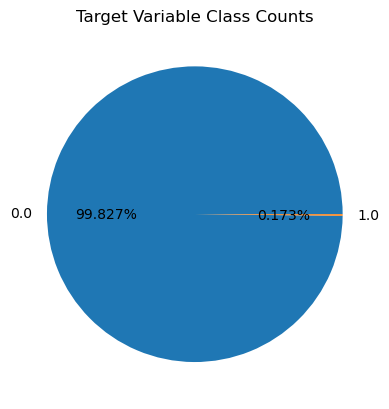

In [19]:
#get the set of different classes
labels=bigger_raw_data.Class.unique()
#get the count of each class
cclass=bigger_raw_data.Class.value_counts().values

#plot the class value counts
fig, ax= plt.subplots()
ax.pie(cclass, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Class Counts')
plt.show()

*Plotting the Histogram for the Amount column*

<function matplotlib.pyplot.show(close=None, block=None)>

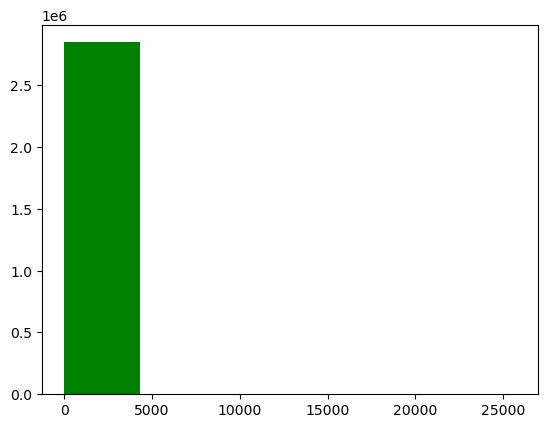

In [20]:
plt.hist(bigger_raw_data.Amount.values, 6, histtype='barstacked', facecolor='g')
plt.show

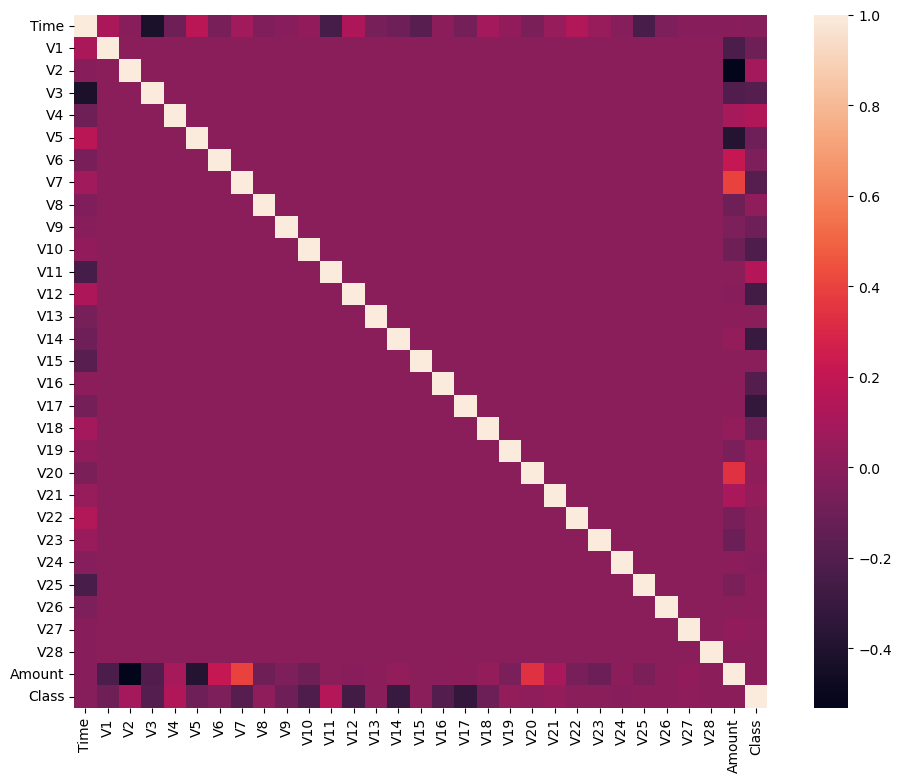

In [21]:
import seaborn as sns
#Plotting the correlation matrix
corr_matrix=bigger_raw_data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, square=True)
plt.show()

*Printing some more info*

In [22]:
print('Maximum transaction amount is:', bigger_raw_data.Amount.values.max())
print('Minimun transaction amount is:', bigger_raw_data.Amount.values.min())
print('75th percentile is:', np.percentile(bigger_raw_data.Amount.values, 75))

Maximum transaction amount is: 25691.16
Minimun transaction amount is: 0.0
75th percentile is: 77.17


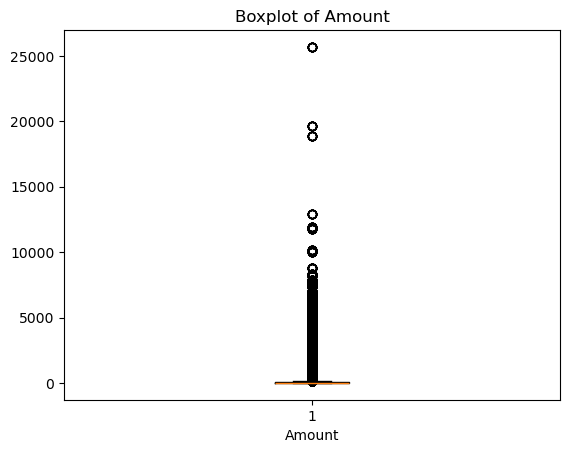

In [23]:
plt.boxplot(bigger_raw_data.Amount.values)
plt.title("Boxplot of Amount")
plt.xlabel("Amount")
plt.show()

**Data Preprocessing**

In [24]:
bigger_raw_data.iloc[:,1:30]=StandardScaler().fit_transform(bigger_raw_data.iloc[:,1:30])
data_matrix=bigger_raw_data.values
X=data_matrix[:,1:30]
y=data_matrix[:, 30]
X=normalize(X, norm='l1')
print('Shape of X:', X.shape, 'Shape of y:', y.shape)

Shape of X: (2848070, 29) Shape of y: (2848070,)


In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Testing dataset:', X_test.shape, y_test.shape)
print('Training dataset:', X_train.shape, y_train.shape)

Testing dataset: (569614, 29) (569614,)
Training dataset: (2278456, 29) (2278456,)


**Build a Decision Tree Classifier with scikit-learn**

In [26]:
w_train=compute_sample_weight('balanced', y_train)

from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier(max_depth=4, random_state=42)
t0=time.time()
ds.fit(X_train, y_train, sample_weight=w_train)
ds_time=time.time()-t0
print('[Scikit-learn] training time:', ds_time)

[Scikit-learn] training time: 80.84326076507568


**Build a decision tree using snapML**

In [27]:
from snapml import DecisionTreeClassifier
snap_ds=DecisionTreeClassifier(max_depth=4, random_state=42, n_jobs=4)
t0=time.time()
snap_ds.fit(X_train, y_train, sample_weight=w_train)
snap_ds_time=time.time()-t0
print('[SnapML] training time:', snap_ds_time)

[SnapML] training time: 8.450728178024292


**Prediction and evaluation**

In [56]:
#using sk-learn
skl_pred=ds.predict_proba(X_test)[:, 1]
skl_roc_auc=roc_auc_score(y_test,skl_pred)
print('sk-learn ROC-AUC score:', skl_roc_auc)
#using snapML
sml_pred=snap_ds.predict_proba(X_test)[:, 1]
sml_roc_auc=roc_auc_score(y_test, sml_pred)
print('snapML ROC-AUC score:', sml_roc_auc)

sk-learn ROC-AUC score: 0.9724840470227328
snapML ROC-AUC score: 0.9637966972465127


In [58]:
y_test.dtype
skl_pred.dtype
y_test=y_test.astype('int32')
skl_pred=skl_pred.astype('int32')

In [59]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
acc=accuracy_score(y_test, skl_pred)
print('The model used is Decision Tree;\nThe evaluation for the sk-learn model is:')
print('Accuracy is:{}'.format(acc))
pre=precision_score(y_test, skl_pred, pos_label=1)
print('Precision is:{}'.format(pre))
rec=recall_score(y_test, skl_pred, pos_label=1)
print('Recall is:{}'.format(rec))
f1=f1_score(y_test, skl_pred, pos_label=1)
print('F1-Score is:{}'.format(f1))
mat=matthews_corrcoef(y_test, skl_pred)
print('The Matthews correlation coefficient is:{}'.format(mat))

The model used is Decision Tree;
The evaluation for the sk-learn model is:
Accuracy is:0.9982725143693799
Precision is:0.0
Recall is:0.0
F1-Score is:0.0
The Matthews correlation coefficient is:0.0


In [62]:
# skl_pred.sum()
# y_test.sum()
# print(confusion_matrix(y_test, skl_pred))
# print('Classification Report:\n', classification_report(y_test, skl_pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE

# Resampling the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model with resampled data
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)

# Make predictions
skl_pred = model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, skl_pred)
pre = precision_score(y_test, skl_pred, average='binary', pos_label=1)
rec = recall_score(y_test, skl_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, skl_pred, average='binary', pos_label=1)
mat = matthews_corrcoef(y_test, skl_pred)

print('The model used is Decision Tree; \nThe evaluation for the sk-learn model is:')
print('Accuracy is: {}'.format(acc))
print('Precision is: {}'.format(pre))
print('Recall is: {}'.format(rec))
print('F1-Score is: {}'.format(f1))
print('The Matthews correlation coefficient is: {}'.format(mat))

# Classification report
print('Classification Report:\n', classification_report(y_test, skl_pred))

# Confusion matrix
print(confusion_matrix(y_test, skl_pred))

The model used is Decision Tree; 
The evaluation for the sk-learn model is:
Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1-Score is: 1.0
The Matthews correlation coefficient is: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    568630
           1       1.00      1.00      1.00       984

    accuracy                           1.00    569614
   macro avg       1.00      1.00      1.00    569614
weighted avg       1.00      1.00      1.00    569614

[[568630      0]
 [     0    984]]


**Build a Support Vector Machine model using scikit-learn**

In [29]:
from sklearn.svm import LinearSVC

sk_svm=LinearSVC(class_weight='balanced', random_state=42, loss='hinge', fit_intercept=False)
t0=time.time()
sk_svm.fit(X_train, y_train)
time_sk=time.time()-t0
print('[sk-learn] training time:', time_sk)

[sk-learn] training time: 139.81676959991455


**Build a Support Vector Machine model using snapML**

In [30]:
from snapml import SupportVectorMachine

snap_svm=SupportVectorMachine(class_weight='balanced', random_state=42, n_jobs=4, fit_intercept=False)
t0=time.time()
snap_svm.fit(X_train, y_train)
time_snap=time.time()-t0
print('[SnapML] training time:', time_snap)

[SnapML] training time: 22.6555392742157


**Predicting and evaluating the models**

In [31]:
sk_pred=sk_svm.decision_function(X_test)
sk_ra=roc_auc_score(y_test, sk_pred)
print('ROC-AUC score for sklearn model:', sk_ra)

snap_pred=snap_svm.decision_function(X_test)
sn_ra=roc_auc_score(y_test, snap_pred)
print('ROC AUC score for snapML model:', sn_ra)

ROC-AUC score for sklearn model: 0.9853214987270075
ROC AUC score for snapML model: 0.985289706081469


**Hinge loss calculation**

In [32]:
from sklearn.metrics import hinge_loss
loss_sn=hinge_loss(y_test, snap_pred)
print('Hinge Loss using SnapML:', loss_sn)
loss_sk=hinge_loss(y_test, sk_pred)
print('Hinge Loss using scilearn module:', loss_sk)

Hinge Loss using SnapML: 0.2150435186223597
Hinge Loss using scilearn module: 0.22185223277728788
